## Toy Model 1: 2 spatial modes with different oscillating frequencies

### Created by Yuying Liu, 09/23/2019

$$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x)cos(\omega_1 t + \frac{\pi}{4})$$

In [1]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import math

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils

## MrCAE

Below is the progressive training framework. 
One could have flexible control over each training step: low-level models are cheap to obtain, and higher level models are built based on them -- one can always revert back to the previous level and adjust the parameters to re-train the model if it is not satisfying. 

In [2]:
# init model & load data
data_path = '../data/toy2'
model_path = '../model/toy2'
result_path = '../result/toy2/'

full_data_path = os.path.join(data_path, 'data.npy')
data = np.load(full_data_path)

torch.Size([5000, 2, 2])


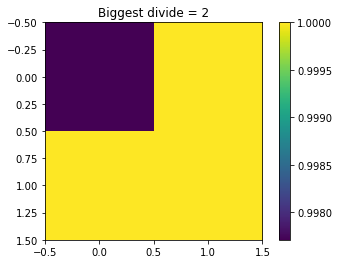

torch.Size([5000, 2, 2])
size_small =  2
size_max =  4
torch.tensor(mse).unsqueeze(0).unsqueeze(0).shape =  torch.Size([1, 1, 4, 4])


C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\utils.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


In [3]:
unresolved_dict = {}
data_levels_dict = {}

#predict 2x2 and graph
current_size = 2
next_size = current_size * 2
resolved = False
current_data = utils.data_of_size(data,current_size)#utils.grow(utils.data_of_size(data,current_size))
next_data = utils.data_of_size(data,next_size)#utils.grow(utils.data_of_size(data,next_size))

print(current_data.shape)
plt.imshow(current_data[0])
plt.title("Biggest divide = "+str(current_size))
plt.colorbar()
plt.show()
print(current_data.shape)
resolved, loss, unresolved = utils.MSE(current_data, next_data, current_size)
unresolved_dict[str(current_size)] = unresolved
data_levels_dict[str(current_size)] = current_data




torch.Size([5000, 2, 2])
torch.Size([5000, 2, 2])
torch.Size([4000, 2, 2])
train data shape =  torch.Size([100, 500, 4])
torch.Size([100, 500, 4])
torch.Size([1, 500, 4])
torch.Size([1, 500, 4])


<ipython-input-31-3e0b042ec0ae>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data[i] = torch.tensor(train_data_raw[r:r+n_steps].reshape(1,n_steps,x_dim**2))


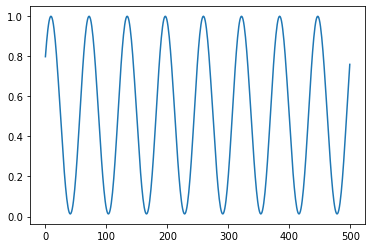

torch.Size([1, 500, 4])
total_dim =  4


In [31]:
#time training on the coursest model



# to_fit =  torch.mean(data_levels_dict['2'], (1,2))
to_fit = data_levels_dict['2']#[:,0,0]
n, x_dim, _ = to_fit.shape

n_steps = 500

print(to_fit.shape)
# print(to_fit.shape)
# print(data_levels_dict['2'].shape)#(1-utils.grow(unresolved_dict['2'].float(),4))*data_levels_dict['4']
# data_this  = to_fit[:,to_fit[0]>0]#data_levels_dict['2']
data_this = to_fit
print(data_this.shape)
# n = len(data_this)

train_data_raw = data_this[:(n-2*n_steps)]
print(train_data_raw.shape)
random_starts = np.random.randint(0,4000 - n_steps, 100)
train_data = torch.zeros((100,n_steps,x_dim**2))
for (i,r) in enumerate(random_starts):
    train_data[i] = torch.tensor(train_data_raw[r:r+n_steps].reshape(1,n_steps,x_dim**2))
    
print("train data shape = ", train_data.shape)

val_data = data_this[(n - 2*n_steps):(n-n_steps)].reshape((1, n_steps, x_dim**2))
test_data = data_this[(n-n_steps):].reshape((1, n_steps, x_dim**2))


# train_encoded = model_space.encode(train_data, model_space.cur_level).reshape((1, len(train_data), len(encoded[0,0])**2))
# val_encoded = model_space.encode(val_data, model_space.cur_level).reshape((1, len(val_data), len(encoded[0,0])**2))
# test_encoded = model_space.encode(test_data, model_space.cur_level).reshape((1, len(test_data), len(encoded[0,0])**2))

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

# plt.imshow(train_data[0].reshape(2,2))
plt.plot(train_data[0,:,0])
# plt.colorbar()
plt.show()

#getting time inputs
# t = np.linspace(0, 8*np.pi, 500)
k = 0                         # model index: should be in {0, 2, ..., 10}
dt = 1#t[1] - t[0]              # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'toy2'
noise = 0.0                   # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epochs = 10000            # the maximum training epoch 
batch_size = 320              # training batch size
min_k = 0
max_k = 7

print(val_data.shape)
_,n_steps, total_dim= val_data.shape
n_steps = n_steps - 1
# total_dim = n_per_dim **2
print("total_dim = ", total_dim)
arch = [total_dim, 128, 128, 128, total_dim] 

# global const
n_forward = 6
step_size = 2**k

criterion = torch.nn.MSELoss(reduction='none')
# print(dt)
# dataset = tnet.DataSet(train_encoded, val_encoded, test_encoded, dt, step_size, n_forward)

unresolved_dict = {}

In [32]:
def train_one_timestep(k, train_data, val_data, test_data, current_size, dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = False):
    step_size = 2**k
    dataset = tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)#tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)
    model_name = 'model_L{}_D{}_noise{}.pt'.format(current_size,step_size, noise)
    model_path_this = os.path.join(model_path, model_name)

    # create/load model object
    print("make_new = ", make_new)
    try:
        if make_new:
            ghj
    #         device = 'cuda' if torch.cuda.is_available() else 'cpu'
        model_time = torch.load(model_path_this)#, map_location=device)
        print("model loaded")
    #     model_time.device = device
        print("don't train = ", dont_train)
        if dont_train:
            return model_time
    except:
        print('create model {} ...'.format(model_name))
        print('dt = ', dt)
        model_time = tnet.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model_time.train_net(dataset, max_epoch=max_epochs, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_path, model_name),threshold= 1e-4)
    
    return model_time

def find_best_timestep(train_data, val_data, test_data, current_size, start_k = 0, largest_k = 7, dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = False):
    models = list()
    step_sizes = list()
    mse_lowest = 1e10 #big number
    mse_list = list()
    mse_less = 0
    idx_lowest = -1
    
    for k in range(7):
        step_size = 2**k
        step_sizes.append(step_size)
        model_time = train_one_timestep(k, train_data, val_data, test_data, current_size, make_new = make_new, dont_train = dont_train)
        models.append(model_time)
    
        #find error
        y_preds = model_time.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
        mse_all = criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1)
#         print(mse_all.shape)
        # step_every = step_sizes[k]
        mean = mse_all.mean(0).detach().numpy()
#         print(mean.shape)
        mse_less = mean[::step_size].mean()
        mse_list.append(mse_less)

        print("mse_lowest = ", mse_lowest)
        print("mse_less= ", mse_less)
        
        if (mse_less< mse_lowest) or (math.isnan(mse_lowest)) or (math.isnan(mse_less)):
            mse_lowest = mse_less
            idx_lowest = k
#         else:
#             print("Done. Best model at k = ", k-1)
#             return models[:-1], step_sizes[:-1], mse_list[:-1]

    return models, step_sizes, mse_list, idx_lowest

In [33]:
#do time training for smallest time step

models, step_sizes, mse_list, idx_lowest = find_best_timestep(train_data, val_data, test_data, 
                                                  current_size, make_new = True, dont_train = True)

print(len(models))
print(step_sizes)
print(mse_list)


C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\utils_time.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.train_x = torch.tensor(train_data[:, x_idx, :]).float().to(self.device)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\utils_time.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.train_ys = torch.tensor(train_data[:, y_start_idx:y_end_idx:step_size, :]).float().to(self.device)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\utils_time.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather th

make_new =  True
create model model_L2_D1_noise0.pt ...
dt =  1
self.n_dim=  4
dataset.n_dim =  4
epoch 1000, training loss 0.0042953528463840485, validation loss 8.868564327713102e-05
(--> new model saved @ epoch 1000)
--> model has reached an accuracy of 1e-8! Finished training!


<ipython-input-32-fc95fec3548c>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = model_time.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\ResNet.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))
C:\Users\16kat\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\16kat\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  

mse_lowest =  10000000000.0
mse_less=  nan
make_new =  True
create model model_L2_D2_noise0.pt ...
dt =  1
self.n_dim=  4
dataset.n_dim =  4
epoch 1000, training loss 0.015294012613594532, validation loss 0.004218294285237789
(--> new model saved @ epoch 1000)
epoch 2000, training loss 0.007011827547103167, validation loss 0.0006808455800637603
(--> new model saved @ epoch 2000)
epoch 3000, training loss 0.007844935171306133, validation loss 0.0006564917857758701
(--> new model saved @ epoch 3000)
epoch 4000, training loss 0.03393182158470154, validation loss 0.007505095563828945
epoch 5000, training loss 0.00586898997426033, validation loss 0.0020289327949285507
epoch 6000, training loss 0.006800148636102676, validation loss 0.001095056300982833
epoch 7000, training loss 0.005338515620678663, validation loss 0.000932657509110868
epoch 8000, training loss 0.0019610137678682804, validation loss 0.0005898505914956331
(--> new model saved @ epoch 8000)
epoch 9000, training loss 0.00162163

6
torch.Size([1, 500, 4])
torch.Size([1, 499, 4])
8


<ipython-input-43-44b0f2886345>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = model.uni_scale_forecast(torch.tensor(val_data[:,0,:]).float(), n_steps=n_steps)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\ResNet.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))


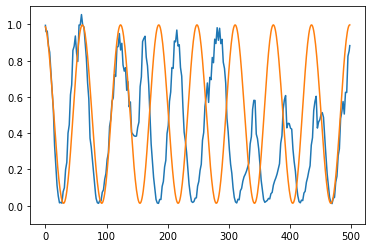

In [43]:
print(idx_lowest)
model = models[1]
print(val_data.shape)
y_preds = model.uni_scale_forecast(torch.tensor(val_data[:,0,:]).float(), n_steps=n_steps)
print(y_preds.shape)
print(len(range(0,499,64)))
plt.plot(y_preds[0,:,0])
plt.plot(val_data[0,1:,0])
plt.ylim([-.1, 1.1])
plt.show()
# plt.plot(val_data_2x2[1:, 0,0])
# plt.plot(range(0,499, 64),val_data_2x2[::64, 0,0], '.')

In [ ]:
# # uniscale time-stepping with NN
preds_mse = list()
times = list()

for model in tqdm(models):
    start = time.time()
    print(val_data.shape)
    y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
    print("y_preds.shape =", y_preds.shape)
    end = time.time()
    times.append(end - start)
    print('criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds) shape =', criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1).shape )
    preds_mse.append(criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1))
    print(len(preds_mse))
    
# visualize forecasting error at each time step    
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(models))))
print(colors)
print("len(models) = ", len(models))
print("len preds_mse = ", len(preds_mse))
print("step_sizes = ", step_sizes)
for k in range(len(models)):
    err = preds_mse[k]
    print('err.shape = ', err.shape)
    mean = err[0].detach().numpy()
    rgb = next(colors)
    print(mean.shape)
#     print(len(t))
#     print(t)
    plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])
# plt.xlim([0, len(t)])
    

In [ ]:
model = models[-1]
y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)

to_fit =  data_levels_dict['2']
data_this = to_fit
print(data_this.shape)
n = len(data_this)

val_data_2x2 = data_this[int(n*0.8):int(0.9*n)].reshape((500, 2,2))
# test_data = data_this[int(0.9*n):].reshape((1, 500, 1))

print("y_preds = ", y_preds.shape)
print("val_data[:, 1:, :] = ", val_data_2x2[:, 1:, :].shape)

resolved, loss, unresolved = utils.MSE(y_preds.reshape(499, 1, 1), val_data_2x2[1:, :, :].reshape(499, 2,2), current_size*2, keep_small = False)
unresolved_dict[str(current_size)] = unresolved
print("loss shape = ", loss.shape)
# data_levels_dict[str(current_size)] = current_data

In [ ]:
mse = criterion(utils.grow(y_preds.reshape(499, 1, 1),2), val_data_2x2[1:, :, :].reshape(499, 2,2))

In [ ]:
print(idx_lowest)
model = models[idx_lowest]
y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
plt.plot(y_preds[0,:,0])
plt.plot(val_data_2x2[1:, 0,0])

In [ ]:
print(loss)

In [ ]:
#train next timestep
k = 1
print("k = ", k)
model_time = train_one_timestep(k, train_data, val_data, test_data, current_size)#, make_new
    
#find error and save if less
y_preds = model_time.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
mse_all = criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1)
print(mse_all.shape)
step_every  = 2**(k-1)
mean = mse_all.mean(0).detach().numpy()
print(mean.shape)
mse_less = mean[::step_every].mean()

if (mse_less< mse_lowest) or (math.isnan(mse_lowest)):
    mse_lowest = mse_less
else:
    print("Done. Best model at k = ", k-1)

print(mse_less)

In [ ]:
#train next timestep
k = 2
print("k = ", k)
model_time = train_one_timestep(k, train_data, val_data, test_data, current_size)#, make_new=True)
    
#find error and save if less
y_preds = model_time.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
mse_all = criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1)
print(mse_all.shape)
step_every  = 2**(k-1)
mean = mse_all.mean(0).detach().numpy()
print(mean.shape)
mse_less = mean[::step_every].mean()

if (mse_less< mse_lowest) or (math.isnan(mse_lowest)):
    mse_lowest = mse_less
else:
    print("Done. Best model at k = ", k-1)

print("mse_lowest = ", mse_lowest)
print("mse_less= ", mse_less)

In [ ]:
#find error at this step size
y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
mse_all = criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1)
step_every = step_sizes[k-1]
mse_less = mean[::step_every].mean()

# # uniscale time-stepping with NN
preds_mse = list()
times = list()

for model in tqdm(time_models):
    start = time.time()
#     print(val_encoded.shape)
    y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
#     print("y_preds.shape =", y_preds.shape)
    end = time.time()
    times.append(end - start)
    print('criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape =', criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1).shape )
    preds_mse.append(criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1))
#     print("len(preds_mse) = ", len(preds_mse))
    
print(len(preds_mse))
print(len(preds_mse[0]))
# visualize forecasting error at each time step    
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
# print(len(colors))
for k in range(max_k-min_k):
    print("k = ", k)
    err = preds_mse[k]
#     print('err.shape = ', err.shape)
    mean = err[0].detach().numpy()
    rgb = next(colors)
#     print(mean.shape)
#     print(len(t))
#     print(t)
    plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])
plt.show()
# plt.xlim([0, len(t)])

fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
print(colors)
for k in range(max_k-min_k):
    err = preds_mse[k]
    mean = err.mean(0).detach().numpy()
#     print(np.mean(mean[::step_every]))
    rgb = next(colors)
    step_every = step_sizes[k-1]
    t = range(len(mean))
    if step_every == 1:
        plt.semilogy(t, mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    else:
        plt.semilogy(t[::step_every], mean[::step_every], linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    print("K = ", k,": step_size = ", step_sizes[k], ": mean = ", mean[::step_every].mean())
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])
    

In [ ]:
# print(unresolved_dict['8'].float())
# print(data_levels_dict['16'])

to_fit = (1-utils.grow(unresolved_dict['8'].float(),16))*data_levels_dict['16']
# imshow(to_)
print(to_fit.shape)

keep = to_fit[:,to_fit[0]>0]
print(keep.shape)

plt.imshow(keep[0].reshape(2,2))
plt.colorbar()

# plt.imshow(res[0])
# plt.colorbar()
# plt.show()

In [ ]:
# graph = (utils.grow(data_levels_dict['4'], 4) * (1-utils.grow(unresolved_dict['2'], 4)))#.reshape((5000,1,4,4))
# keep = np.repeat( (1-utils.grow(unresolved_dict['2'], 4)), 5000, axis = 0)
# print("keep shape = ", keep.shape)

# print("(1-utils.grow(unresolved_dict['2'], 4)) shape = ", (1-utils.grow(unresolved_dict['2'], 4)).shape)
# print("graph shape = ", graph.shape)
# # smaller = [i for (i, v) in zip(graph, (1-utils.grow(unresolved_dict['2'], 4))) if v]
# smaller = graph[keep.astype(bool)].reshape(5000,)
# # smaller = np.ma.masked_array(graph, mask=(1-utils.grow(unresolved_dict['2'], 4)))
# # smaller = graph[np.where(graph>0)]
# print("smaller shape = ", smaller.shape)
# plt.imshow(smaller[0])
# plt.colorbar()

In [ ]:
# to_graph = data_levels_dict['8']*(1-unresolved_dict['8'].numpy())
# plt.imshow(to_graph[0])
# plt.colorbar()

# This is where some time stuff will start eventually 

In [ ]:

# print(model_space.cur_level)
# # all_data = dataset.obtain_data_at_current_level_all(model_space.cur_level)
# print(all_data.shape)
# train_data, val_data, test_data =dataset.obtain_data_at_current_level(model_space.cur_level)
# encoded = model_space.encode(all_data, model_space.cur_level)
# print(encoded.shape)

to_fit =  (1-utils.grow(unresolved_dict['8'].float(),16))*data_levels_dict['16']
data_this = keep = to_fit[:,to_fit[0]>0]#data_levels_dict['2']
print(data_this.shape)
n = len(data_this)

train_data_raw = data_this[:int(n*0.8),:]
print(train_data_raw.shape)
random_starts = np.random.randint(0,4000 - 500, 100)
train_data = torch.zeros((100,500,4))
for (i,r) in enumerate(random_starts):
    train_data[i] = torch.tensor(train_data_raw[r:r+500,:].reshape(1,500,4))

val_data = data_this[int(n*0.8):int(0.9*n),:].reshape((1, 500, 4))
test_data = data_this[int(0.9*n):,:].reshape((1, 500, 4))
# train_encoded = model_space.encode(train_data, model_space.cur_level).reshape((1, len(train_data), len(encoded[0,0])**2))
# val_encoded = model_space.encode(val_data, model_space.cur_level).reshape((1, len(val_data), len(encoded[0,0])**2))
# test_encoded = model_space.encode(test_data, model_space.cur_level).reshape((1, len(test_data), len(encoded[0,0])**2))

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

In [ ]:
#getting time inputs
# t = np.linspace(0, 8*np.pi, 500)
k = 0                         # model index: should be in {0, 2, ..., 10}
dt = 1#t[1] - t[0]              # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'toy2'
noise = 0.0                   # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epochs = 10000            # the maximum training epoch 
batch_size = 320              # training batch size
min_k = 0
max_k = 7

print(val_data.shape)
_,n_steps, total_dim= val_data.shape
n_steps = n_steps - 1
# total_dim = n_per_dim **2
print("total_dim = ", total_dim)
arch = [total_dim, 128, 128, 128, total_dim] 

# global const
n_forward = 5
step_size = 2**k

criterion = torch.nn.MSELoss(reduction='none')
# print(dt)
# dataset = tnet.DataSet(train_encoded, val_encoded, test_encoded, dt, step_size, n_forward)

In [ ]:
#do time training 
time_models = list()
step_sizes = list()
for k in range(min_k, max_k):
    print("k = ", k)
    step_size = 2**k
    step_sizes.append(step_size)
    dataset = tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)#tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)
#     print(dataset.train_x.shape)
    model_name = 'model_D{}_noise{}_0.pt'.format(step_size, noise)
    model_path_this = os.path.join(model_path, model_name)

    # create/load model object
    try:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        model_time = torch.load(model_path_this, map_location=device)
        model_time.device = device
    except:
        print('create model {} ...'.format(model_name))
        print('dt = ', dt)
        model_time = tnet.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model_time.train_net(dataset, max_epoch=max_epochs, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_path, model_name),threshold= 1e-4)
    
# load models
# for step_size in step_sizes:
    print('load model_D{}.pt'.format(step_size))
    time_models.append(torch.load(model_path_this, map_location='cpu'))
    
# fix model consistencies trained on gpus (optional)
for model in time_models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

In [ ]:

#do time training 
time_models = list()
step_sizes = list()
for k in range(min_k, max_k):
    print("k = ", k)
    step_size = 2**k
    step_sizes.append(step_size)
    model_name = 'model_D{}_noise{}_0.pt'.format(step_size, noise)
    model_path_this = os.path.join(model_path, model_name)
    # load models
    # for step_size in step_sizes:
    print('load model_D{}.pt'.format(step_size))
    time_models.append(torch.load(model_path_this, map_location='cpu'))

# fix model consistencies trained on gpus (optional)
for model in time_models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

In [ ]:
print(len(time_models))
print(len(step_sizes))
print(step_sizes)

In [ ]:
# # uniscale time-stepping with NN
preds_mse = list()
times = list()

for model in tqdm(time_models):
    start = time.time()
#     print(val_encoded.shape)
    y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
#     print("y_preds.shape =", y_preds.shape)
    end = time.time()
    times.append(end - start)
    print('criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape =', criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1).shape )
    preds_mse.append(criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1))
#     print("len(preds_mse) = ", len(preds_mse))
    
print(len(preds_mse))
print(len(preds_mse[0]))
# visualize forecasting error at each time step    
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
# print(len(colors))
for k in range(max_k-min_k):
    print("k = ", k)
    err = preds_mse[k]
#     print('err.shape = ', err.shape)
    mean = err[0].detach().numpy()
    rgb = next(colors)
#     print(mean.shape)
#     print(len(t))
#     print(t)
    plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])
plt.show()
# plt.xlim([0, len(t)])
    

In [ ]:
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
print(colors)
for k in range(max_k-min_k):
    err = preds_mse[k]
    mean = err.mean(0).detach().numpy()
#     print(np.mean(mean[::step_every]))
    rgb = next(colors)
    step_every = step_sizes[k-1]
    t = range(len(mean))
    if step_every == 1:
        plt.semilogy(t, mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    else:
        plt.semilogy(t[::step_every], mean[::step_every], linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    print("K = ", k,": step_size = ", step_sizes[k], ": mean = ", mean[::step_every].mean())
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])

In [ ]:
k = 3
model = time_models[k]
y_preds = np.array(model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps))
# y_preds = y_preds.detach().numpy()

print("y_preds shape = ", y_preds.shape)
plt.imshow(y_preds[0,-1].reshape(2,2))
plt.colorbar()
plt.show()

plt.imshow(val_data[0,-1].reshape(2,2))
plt.colorbar()
plt.show()

In [ ]:
plt.plot(y_preds[0,:,3], label = "fast")
print(y_preds.shape)
plt.plot(y_preds[0,:,0], label = "slow")
plt.legend()
# plt.plot(y_preds[0,:,1])
# plt.plot(y_preds[0,:,2])

In [ ]:
#time training on the coursest model




to_fit =  (1-utils.grow(unresolved_dict['2'].float(),4))*data_levels_dict['4']
data_this  = to_fit[:,to_fit[0]>0]#data_levels_dict['2']
print(data_this.shape)
n = len(data_this)

train_data_raw = data_this[:int(n*0.8),:]
print(train_data_raw.shape)
random_starts = np.random.randint(0,4000 - 500, 100)
train_data = torch.zeros((100,500,4))
for (i,r) in enumerate(random_starts):
    train_data[i] = torch.tensor(train_data_raw[r:r+500,:].reshape(1,500,4))

val_data = data_this[int(n*0.8):int(0.9*n),:].reshape((1, 500, 4))
test_data = data_this[int(0.9*n):,:].reshape((1, 500, 4))


# train_encoded = model_space.encode(train_data, model_space.cur_level).reshape((1, len(train_data), len(encoded[0,0])**2))
# val_encoded = model_space.encode(val_data, model_space.cur_level).reshape((1, len(val_data), len(encoded[0,0])**2))
# test_encoded = model_space.encode(test_data, model_space.cur_level).reshape((1, len(test_data), len(encoded[0,0])**2))

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

plt.imshow(train_data[0,0].reshape(2,2))
plt.show()

#getting time inputs
# t = np.linspace(0, 8*np.pi, 500)
k = 0                         # model index: should be in {0, 2, ..., 10}
dt = 1#t[1] - t[0]              # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'toy2'
noise = 0.0                   # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epochs = 10000            # the maximum training epoch 
batch_size = 320              # training batch size
min_k = 0
max_k = 7

print(val_data.shape)
_,n_steps, total_dim= val_data.shape
n_steps = n_steps - 1
# total_dim = n_per_dim **2
print("total_dim = ", total_dim)
arch = [total_dim, 128, 128, 128, total_dim] 

# global const
n_forward = 5
step_size = 2**k

criterion = torch.nn.MSELoss(reduction='none')
# print(dt)
# dataset = tnet.DataSet(train_encoded, val_encoded, test_encoded, dt, step_size, n_forward)


In [ ]:
#do time training 
time_models = list()
step_sizes = list()
for k in range(min_k, max_k):
    print("k = ", k)
    step_size = 2**k
    step_sizes.append(step_size)
    dataset = tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)#tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)
#     print(dataset.train_x.shape)
    model_name = 'model_D{}_noise{}_0_coursest.pt'.format(step_size, noise)
    model_path_this = os.path.join(model_path, model_name)

    # create/load model object
    try:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        model_time = torch.load(model_path_this, map_location=device)
        model_time.device = device
    except:
        print('create model {} ...'.format(model_name))
        print('dt = ', dt)
        model_time = tnet.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model_time.train_net(dataset, max_epoch=max_epochs, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_path, model_name),threshold= 1e-4)
    
# load models
# for step_size in step_sizes:
    print('load model_D{}.pt'.format(step_size))
    time_models.append(torch.load(model_path_this, map_location='cpu'))
    
# fix model consistencies trained on gpus (optional)
for model in time_models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

In [ ]:
# # uniscale time-stepping with NN
preds_mse = list()
times = list()

for model in tqdm(time_models):
    start = time.time()
#     print(val_encoded.shape)
    y_preds = model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps)
#     print("y_preds.shape =", y_preds.shape)
    end = time.time()
    times.append(end - start)
    print('criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape =', criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1).shape )
    preds_mse.append(criterion(torch.tensor(val_data[:, 1:, :]).float(), y_preds).mean(-1))
#     print("len(preds_mse) = ", len(preds_mse))
    
print(len(preds_mse))
print(len(preds_mse[0]))
# visualize forecasting error at each time step    
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
# print(len(colors))
for k in range(max_k-min_k):
    print("k = ", k)
    err = preds_mse[k]
#     print('err.shape = ', err.shape)
    mean = err[0].detach().numpy()
    rgb = next(colors)
#     print(mean.shape)
#     print(len(t))
#     print(t)
    plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-6, 10])
plt.show()
# plt.xlim([0, len(t)])
    

In [ ]:
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
print(colors)
for k in range(max_k-min_k):
    err = preds_mse[k]
    mean = err.mean(0).detach().numpy()
#     print(np.mean(mean[::step_every]))
    rgb = next(colors)
    step_every = step_sizes[k-1]
    t = range(len(mean))
    if step_every == 1:
        plt.semilogy(t, mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    else:
        plt.semilogy(t[::step_every], mean[::step_every], linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
    print("K = ", k,": step_size = ", step_sizes[k], ": mean = ", mean[::step_every].mean())
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])

In [ ]:
k = 3
model = time_models[k]
y_preds = np.array(model.uni_scale_forecast(torch.tensor(val_data[:, 0, :]).float(), n_steps=n_steps))
# y_preds = y_preds.detach().numpy()

print("y_preds shape = ", y_preds.shape)
plt.imshow(y_preds[0,-1].reshape(2,2))
plt.colorbar()
plt.show()

plt.imshow(val_data[0,-1].reshape(2,2))
plt.colorbar()
plt.show()

plt.plot(y_preds[0,:,0], label = "fast")
print(y_preds.shape)
plt.plot(y_preds[0,:,1], label = "slow")
# plt.plot(val_data[0,:,0], label = "truth fast")
# print(y_preds.shape)
# plt.plot(val_data[0,:,1], label = "truth slow")

plt.legend()


# plt.plot(y_preds[0,:,1])
# plt.plot(y_preds[0,:,2])

In [ ]:
utils.animate(y_preds.reshape(1,499,2,2), os.path.join(result_path, '2x2_predicted.gif'))
utils.animate(val_data[0,1:].reshape(1,499,2,2), os.path.join(result_path, '2x2_truth.gif'))

In [ ]:

to_fit = (1-utils.grow(unresolved_dict['4'].float(),8))*data_levels_dict['8']
# imshow(to_)
print(to_fit.shape)

keep = to_fit[:,to_fit[0]>0]
print(keep.shape)

plt.imshow(keep[0].reshape(2,2))
plt.colorbar()

In [ ]:
#need to predict encoded dta in time and then decode

print(n_steps)
train_preds_time = model.uni_scale_forecast(torch.tensor(train_encoded[:, 0, :]).float(), n_steps=len(train_encoded[0])-1)
val_preds_time = model.uni_scale_forecast(torch.tensor(val_encoded[:, 0, :]).float(), n_steps=n_steps)
test_preds_time = model.uni_scale_forecast(torch.tensor(test_encoded[:, 0, :]).float(), n_steps=len(test_encoded[0])-1)
print(criterion(torch.tensor(train_encoded[:, 1:, :]).float(), train_preds_time).mean(-1).mean())
print(criterion(torch.tensor(val_encoded[:, 1:, :]).float(), val_preds_time).mean(-1).mean())
print(criterion(torch.tensor(test_encoded[:, 1:, :]).float(), test_preds_time).mean(-1).mean())
# train_encoded

#decode
print(train_preds_time.reshape((3499,3,3)).shape)
to_decode_train = torch.tensor(train_preds_time.reshape((3499,3,3))).unsqueeze(1).float()
train_decoded = model_space.decode(to_decode_train, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))
print(train_decoded.shape)

print(val_preds_time.shape)
to_decode_val = torch.tensor(val_preds_time.reshape((999,3,3))).unsqueeze(1).float()
val_decoded = model_space.decode(to_decode_val, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))

print(test_preds_time.shape)
to_decode_test = torch.tensor(test_preds_time.reshape((len(test_preds_time[0]),3,3)).unsqueeze(1).float())
test_decoded = model_space.decode(to_decode_test, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))
print(test_decoded.shape)

In [ ]:
train_preds_time.shape
plt.imshow(train_preds_time[0,500].reshape(3,3))
plt.colorbar()

In [ ]:
print(train_decoded.shape)
plt.imshow(train_decoded[499,0].detach().numpy())
plt.colorbar()
plt.show()
print(train_data.shape)
plt.imshow(train_data[21,0].detach().numpy())
plt.colorbar()
plt.show()

mse =criterion(torch.tensor(train_decoded[:]).float(), train_data[:-1,].float()).mean( axis=(1, 2,3))
print(mse.shape)
plt.semilogy(mse)

In [ ]:

print(test_preds_time.shape)
mse =criterion(torch.tensor(val_decoded[:]).float(), val_data[:-1,].float()).mean( axis=(1,2,3))
print(mse.shape)
plt.semilogy(mse)
plt.title("val error of decoded")
plt.show()

print(test_preds_time.shape)
mse =criterion(torch.tensor(test_decoded[:]).float(), test_data[:-1,].float()).mean( axis=(1,2,3))
print(mse.shape)
plt.semilogy(mse)
plt.title("test error of decoded")

In [ ]:
utils.animate(test_decoded.detach().numpy(), os.path.join(result_path, 'decoded_test_7x7.gif'))

In [ ]:
# torch.tensor(train_decoded[:]).float(), train_data[:-1,].float())
print(train_decoded.shape)
tol = 0.1
fully_resolved, loss, resolved_map = net.check_pixel_level_loss(train_decoded[:499].float(), train_data[1:500,].float(), tol=tol, device = 'cpu')

In [ ]:
print(loss.shape)
plt.imshow(loss.detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(resolved_map.detach().numpy())
plt.colorbar()
plt.show()